In [21]:
import math
import matplotlib.pyplot as plt

In [22]:
def fibonacci_search(f, a, b, tol=1e-10, max_iter=1000):
    # Define Fibonacci sequence and find the smallest two numbers greater than the interval size
    fib_seq = [1, 1, 2]
    while fib_seq[-1] <= (b-a)/tol:
        fib_seq.append(fib_seq[-1] + fib_seq[-2])
    n = len(fib_seq) - 1
    
    # Set initial values for interval boundaries and function evaluations
    c = a + (fib_seq[n-1]/fib_seq[n+1] if n+1 < len(fib_seq) else 1/2) * (b-a)
    x1 = a
    x2 = b
    fc = f(c)
    f1 = f(x1)
    f2 = f(x2)

    # Repeat the process until the interval is small enough or max_iter is reached
    for i in range(max_iter):
        if fc < f1 and fc < f2:
            # Minimum is in [a, c]
            x2 = c
            f2 = fc
            c = a + (fib_seq[n-2]/fib_seq[n]) * (b-a)
            fc = f(c)
        else:
            # Minimum is in [c, b]
            x1 = c
            f1 = fc
            c = a + (fib_seq[n-1]/fib_seq[n]) * (b-a)
            fc = f(c)
            
        if abs(x2 - x1) < tol:
            break

    if x1 < x2:
        x1, x2 = x1, x2
    else:
        x1, x2 = x2, x1

    
    print('New interval is: [',x1,',',x2,']')
    return (x1 + x2)/2  # Return the midpoint of the final interval as the estimate for the minimum

New interval is: [ 1.7082039324993694 , 4 ]


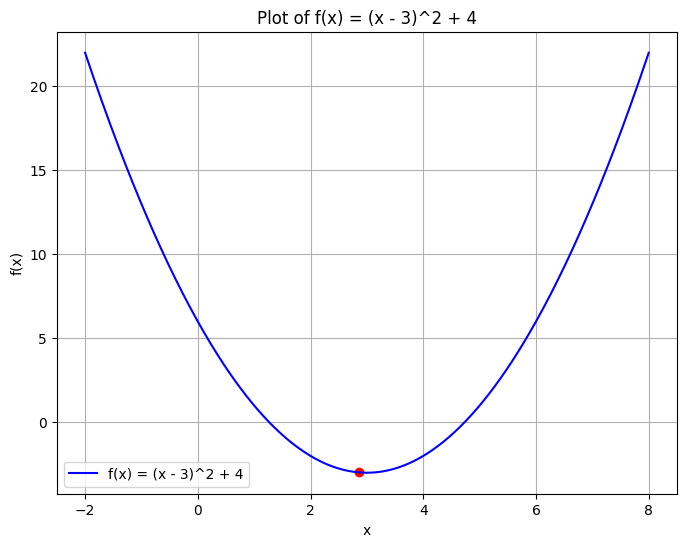

In [23]:
def unimodal_function(x):
    return (x - 3)**2 -3


x = np.linspace(-2, 8, 400)
y = unimodal_function(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = (x - 3)^2 + 4', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = (x - 3)^2 + 4')
root = fibonacci_search(unimodal_function, -2, 4, max_iter=20)
plt.scatter(root, unimodal_function(root), color="red")
plt.grid(True)
plt.legend()
plt.show()